# CS5691 - PRML  Assignment 1

# TASK - 1

Perform polynomial regression on the given datasets 

using training datasets of sizes 10 and 200 
and with different model complexities (2,3,6 and 9)

Repeat the same with Quadratic regularization with different values of Lambda.

PLOT AND COMPARE ALL THE RESULTS.

* Index of functions:

-

In [192]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [193]:
df = pd.read_csv('function0.csv')
df.head()

,Unnamed: 0,x,y
0,0,-0.513087,1.471849
1,1,1.692695,7.142129
2,2,-0.745941,2.075071
3,3,0.906749,0.656626
4,4,-1.684596,4.188823


In [194]:
df.describe()

,Unnamed: 0,x,y
count,2000.000000,2000.000000,2000.000000
mean,999.500000,0.011442,2.670884
std,577.494589,1.148974,2.805942
min,0.000000,-1.998114,-0.628992
25%,499.750000,-0.962695,0.346178
50%,999.500000,0.016566,2.181590
75%,1499.250000,0.963699,4.096364
max,1999.000000,1.997366,12.001958


Dataset has input features - X 
       and output variable - Y

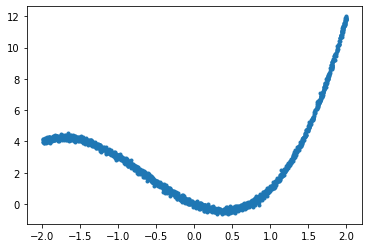

In [195]:
x = np.array(df['x'])
y = np.array(df['y'])
# print(x)
# print(y.shape)
plt.scatter(x,y,marker = '.')

In [196]:
def get_feature_mat(x,deg):
    
    mat = []
    for a in x:
        
        l = [a**i for i in range(0,deg+1)]
        mat.append(l)
        
    return np.array(mat)

In [197]:
def get_weights(feature,y):
    
    return np.dot(np.linalg.pinv(feature),y)

In [198]:
def get_sample_data(df,size):
    
    sam = df.sample(n = size, random_state = 1)
    x = np.array(sam['x'])
    y = np.array(sam['y'])
    
    return x, y

In [199]:
def polynomial_regression(x,y,deg):
    
#     x,y = get_sample_data(df,sample_size)
    
    features = get_feature_mat(x,deg)
    
    w_star = get_weights(features,y)
    
    return w_star

In [200]:
def predict(x,weight,deg):
    
    f = [x**i for i in range(0,deg+1)]
    
    return np.dot(f,weight)

In [201]:
size = 10

X,Y = get_sample_data(df,size)

In [202]:
# W = polynomial_regression(X,Y,degree)

# print(W)

In [203]:
# plt.scatter(X,y_hat)
# plt.scatter(X,Y)
x_axis = np.linspace(-2,2,100)

W2_10 = polynomial_regression(X,Y,2)
f2 = get_feature_mat(x_axis,2)

W3_10 = polynomial_regression(X,Y,3)
f3 = get_feature_mat(x_axis,3)

W6_10 = polynomial_regression(X,Y,6)
f6 = get_feature_mat(x_axis,6)

W9_10 = polynomial_regression(X,Y,9)
f9 = get_feature_mat(x_axis,9)

# plt.plot(x_axis, np.dot(f,W),'r-')
# plt.title('with degree 9 ')


Text(0.5, 1.0, 'with degree 9')

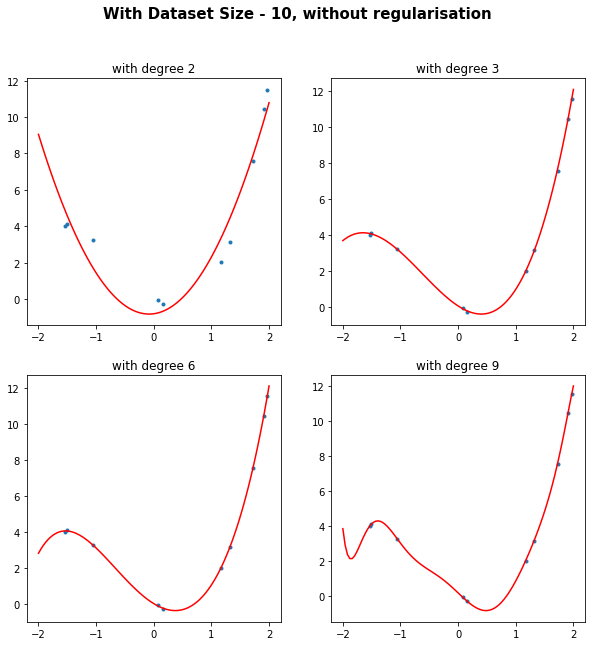

In [204]:
fig, ((a2,a3),(a6,a9)) = plt.subplots(2,2,figsize = (10,10))
fig.suptitle('With Dataset Size - 10, without regularisation', fontsize = 15, weight = 'bold')


a2.scatter(X,Y,marker = '.')
a2.plot(x_axis,np.dot(f2,W2_10),'r-')
a2.set_title('with degree 2')

a3.scatter(X,Y,marker = '.')
a3.plot(x_axis,np.dot(f3,W3_10),'r-')
a3.set_title('with degree 3')

a6.scatter(X,Y,marker = '.')
a6.plot(x_axis,np.dot(f6,W6_10),'r-')
a6.set_title('with degree 6')

a9.scatter(X,Y,marker = '.')
a9.plot(x_axis,np.dot(f9,W9_10),'r-')
a9.set_title('with degree 9')

In [205]:
size = 200

X,Y = get_sample_data(df,size)

In [206]:
# plt.scatter(X,y_hat)
# plt.scatter(X,Y)
x_axis = np.linspace(-2,2,100)

W2_200 = polynomial_regression(X,Y,2)
f2 = get_feature_mat(x_axis,2)

W3_200 = polynomial_regression(X,Y,3)
f3 = get_feature_mat(x_axis,3)

W6_200 = polynomial_regression(X,Y,6)
f6 = get_feature_mat(x_axis,6)

W9_200 = polynomial_regression(X,Y,9)
f9 = get_feature_mat(x_axis,9)
print(f'w9 - {W9_200}')

# plt.plot(x_axis, np.dot(f,W),'r-')
# plt.title('with degree 9 ')


w9 - [ 0.00599202 -1.90690036  1.97931513  0.70995035  0.04138778  0.26225115
 -0.02097313 -0.08776267  0.00298991  0.00982605]


Text(0.5, 1.0, 'with degree 9')

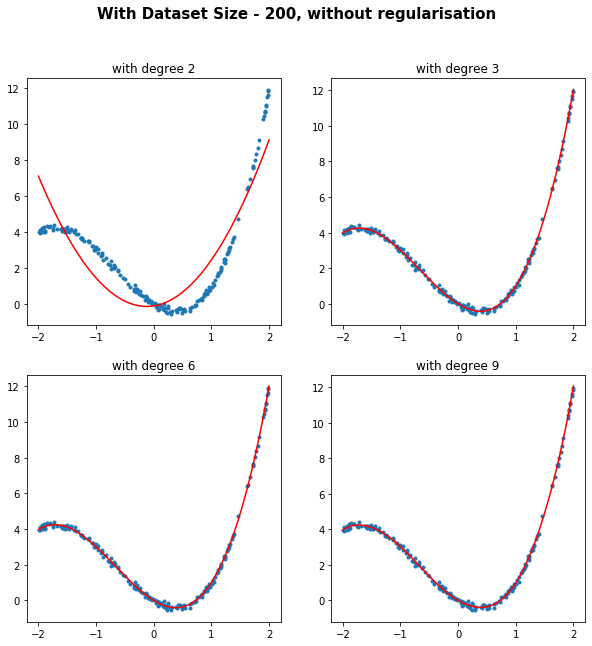

In [207]:
fig, ((a2,a3),(a6,a9)) = plt.subplots(2,2,figsize = (10,10))
fig.suptitle('With Dataset Size - 200, without regularisation', fontsize = 15,weight = 'bold')


a2.scatter(X,Y,marker = '.')
a2.plot(x_axis,np.dot(f2,W2_200),'r-')
a2.set_title('with degree 2')

a3.scatter(X,Y,marker = '.')
a3.plot(x_axis,np.dot(f3,W3_200),'r-')
a3.set_title('with degree 3')

a6.scatter(X,Y,marker = '.')
a6.plot(x_axis,np.dot(f6,W6_200),'r-')
a6.set_title('with degree 6')

a9.scatter(X,Y,marker = '.')
a9.plot(x_axis,np.dot(f9,W9_200),'r-')
a9.set_title('with degree 9')

Now we have to repeat the same tasks but with implementing quadratic regularization:

and for different values of lambda.

In [208]:
def get_regularised_weights(feature,y,lamb):
    
    fTf = np.dot(feature.T,feature)
    n = fTf.shape[0]
    fTf /= n
    b = np.linalg.inv(fTf + lamb*np.identity(n))
    
    return np.dot(np.dot(b,feature.T),y)/n

In [209]:
def poly_regression_with_regu(x,y,deg,lamb):
    
    features = get_feature_mat(x,deg)
    
    w_star = get_regularised_weights(features,y,lamb)
#     w_star = get_weights(features,y)
    
    return w_star


In [210]:
# size = 10

# X, Y = get_sample_data(df,size)

# l0 = 10
# l1 = 1
# l2 = 10**-3
# l3 = 10**-8


In [211]:
# wr_10_l1 = poly_regression_with_regu(X,Y,9,l1)
# wr_10_l2 = poly_regression_with_regu(X,Y,9,l2)
# wr_10_l3 = poly_regression_with_regu(X,Y,9,l3)
# print(wr_10_l1)
# print(wr_10_l2)

[ 0.18944506 -0.09897085  0.30365494 -0.05192907  0.32961526  0.0024249
  0.27145749  0.04704379 -0.05628944 -0.00641975]
[-7.18430260e-02 -1.09456863e+00  1.43070178e+00  4.16386817e-04
  9.20185689e-01  6.77624792e-02 -2.49205804e-01  7.27928569e-02
 -1.81106247e-02  5.90511615e-03]


In [212]:
# fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize = (15,5))
# fig.suptitle('With regularization with Dataset size 10, and degree 9')

# f1 = get_feature_mat(x_axis,9)
# ax1.scatter(X,Y,facecolors = None)
# ax1.plot(x_axis,np.dot(f1,wr_10_l1),'r-')
# ax1.set_title('lambda = 1')

# # f1 = get_feature_mat(x_axis,9)
# ax2.scatter(X,Y,marker = 'o',facecolors = None)
# ax2.plot(x_axis,np.dot(f1,wr_10_l2),'r-')
# ax2.set_title('lambda = exp(-10)')

# ax3.scatter(X,Y,marker = 'o',facecolors = None)
# ax3.plot(x_axis,np.dot(f1,wr_10_l3),'r-')
# ax3.set_title('lambda = 0')


# # plt.ylim(-1,12)

In [213]:
# size = 200
# X, Y = get_sample_data(df,size)

# l1 = 1
# l2 = np.exp(-10)
# l3 =0

In [214]:
# wr_200_l1 = poly_regression_with_regu(X,Y,9,l1)
# wr_200_l2 = poly_regression_with_regu(X,Y,9,l2)
# wr_200_l3 = poly_regression_with_regu(X,Y,9,l3)
# print(wr_200_l3)
# print(wr_200_l1)

[ 0.00599202 -1.90690036  1.97931513  0.70995035  0.04138778  0.26225115
 -0.02097313 -0.08776267  0.00298991  0.00982605]
[ 0.24004389 -0.96864993  0.99295594 -0.12939571  0.6450292   0.20667629
 -0.11909903  0.07697012  0.00373968 -0.01887329]


In [215]:
# fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize = (15,5))
# fig.suptitle('With regularization with Dataset size 200, and degree 9')

# f1 = get_feature_mat(x_axis,9)
# ax1.scatter(X,Y,facecolors = None)
# ax1.plot(x_axis,np.dot(f1,wr_200_l1),'r-')
# ax1.set_title('lambda = 1')

# # f1 = get_feature_mat(x_axis,9)
# ax2.scatter(X,Y,marker = 'o',facecolors = None)
# ax2.plot(x_axis,np.dot(f1,wr_200_l2),'r-')
# ax2.set_title('lambda = exp(-10)')

# ax3.scatter(X,Y,marker = 'o',facecolors = None)
# ax3.plot(x_axis,np.dot(f1,wr_200_l3),'r-')
# ax3.set_title('lambda = 0')


# # plt.ylim(-1,12)

In [225]:
def e_rms(weight, df, deg):
    
    l = len(df)
    
    train = df[:int(0.7*l)]
    val = df[int(0.7*l):int(0.9*l)]
    test  = df[int(0.9*l):]
    
    x1_train, y_train = map(np.array,[train.x, train.y])
    x1_val, y_val = map(np.array,[val.x, val.y])
    x1_test, y_test = map(np.array,[test.x, test.y])
    
    t_train =  np.array([predict(a,weight,deg) for a in x1_train])
    t_val =  np.array([predict(a,weight,deg) for a in x1_val])
    t_test =  np.array([predict(a,weight,deg) for a in x1_test])
 
    e_train = 1/len(train)*(np.sum((t_train - y_train)**2))**0.5
    e_val = 1/len(val)*(np.sum((t_val - y_val)**2))**0.5
    e_test = 1/len(test)*((np.sum(t_test - y_test)**2))**0.5
    
    return e_train, e_val, e_test

In [216]:
def final_func(df,size,deg):
    
    X,Y = get_sample_data(df,size)
    l1,l2,l3,l4 = 10**-8,10**-3,1,10
    
    w1 = poly_regression_with_regu(X,Y,deg,l1)
    w2 = poly_regression_with_regu(X,Y,deg,l2)
    w3 = poly_regression_with_regu(X,Y,deg,l3)
    w4 = poly_regression_with_regu(X,Y,deg,l4)
    
    
    f, (a1,a2,a3,a4) = plt.subplots(1,4,figsize = (20,5))
    f.suptitle('Dataset size-{}, Degree-{}, various lambda'.format(size,deg))
    
    x_axis = np.linspace(-2,2,100)
    
    f1 = get_feature_mat(x_axis,deg)
    a1.scatter(X,Y,facecolors = None)
    a1.plot(x_axis,np.dot(f1,w1),'r-')
    a1.set_title('lambda = {}'.format(l1))
    
#     f1 = get_feature_mat(x_axis,deg)
    a2.scatter(X,Y,facecolors = None)
    a2.plot(x_axis,np.dot(f1,w2),'r-')
    a2.set_title('lambda = {}'.format(l2))
    
#     f1 = get_feature_mat(x_axis,deg)
    a3.scatter(X,Y,facecolors = None)
    a3.plot(x_axis,np.dot(f1,w3),'r-')
    a3.set_title('lambda = {}'.format(l3))
    
#     f1 = get_feature_mat(x_axis,deg)
    a4.scatter(X,Y,facecolors = None)
    a4.plot(x_axis,np.dot(f1,w4),'r-')
    a4.set_title('lambda = {}'.format(l4))
    
    plt.show()

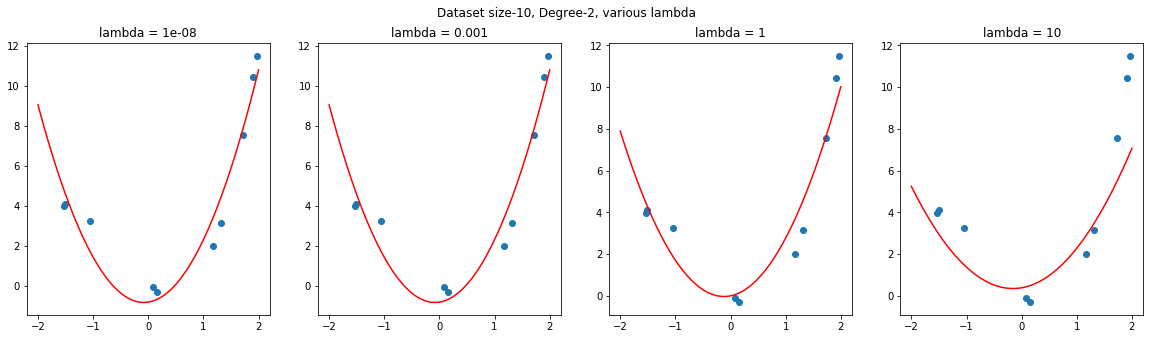

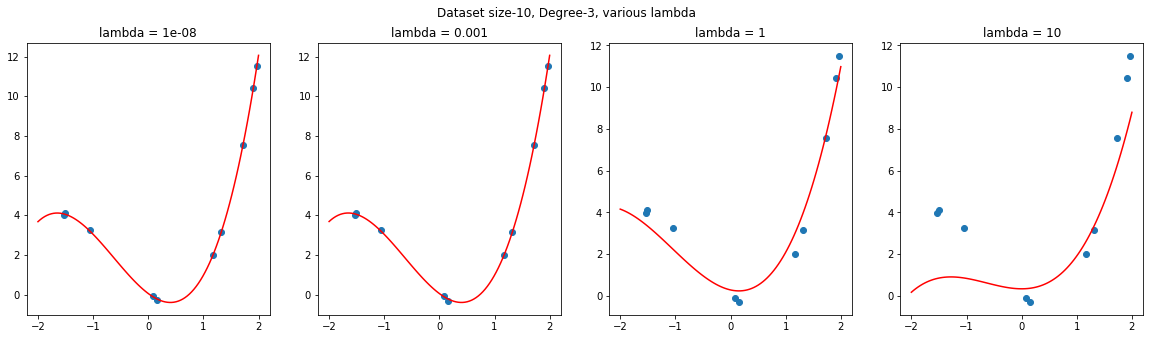

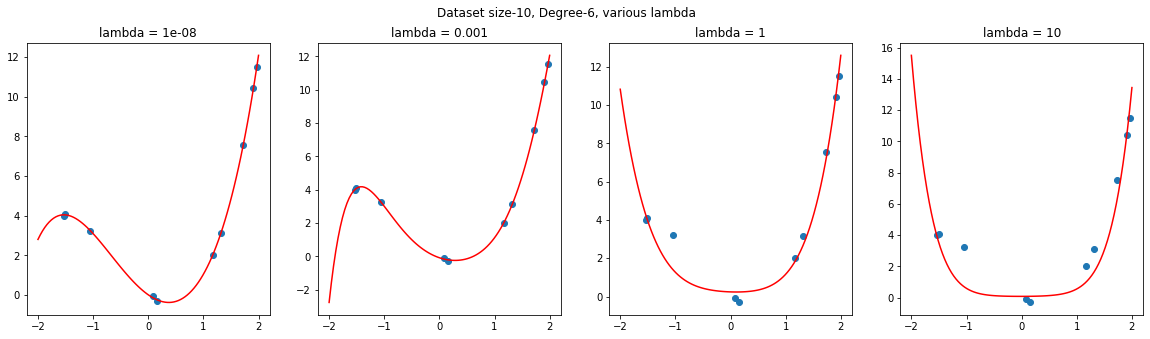

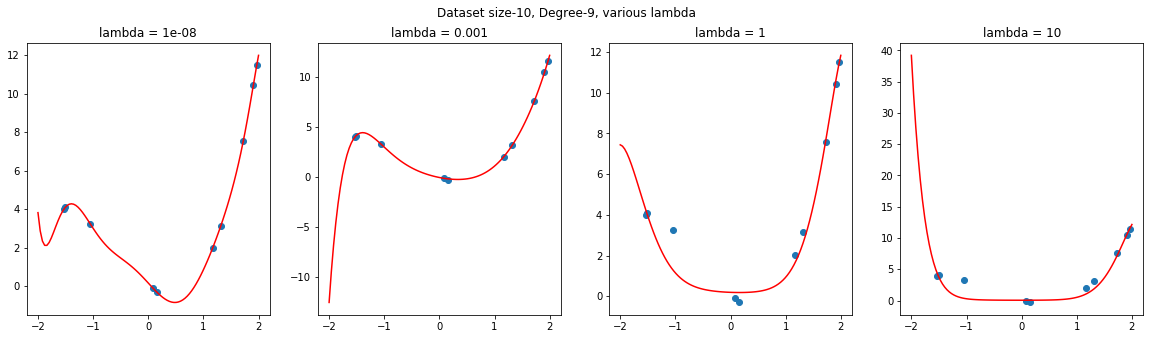

In [217]:
final_func(df,10,2)
final_func(df,10,3)
final_func(df,10,6)
final_func(df,10,9)

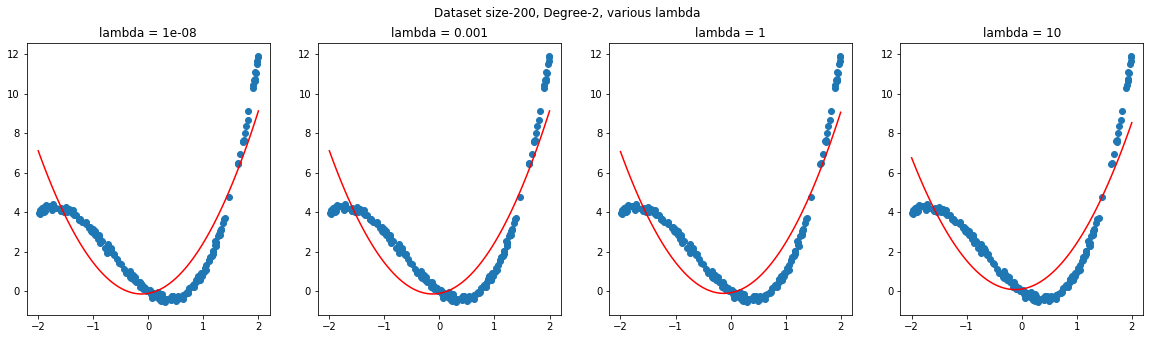

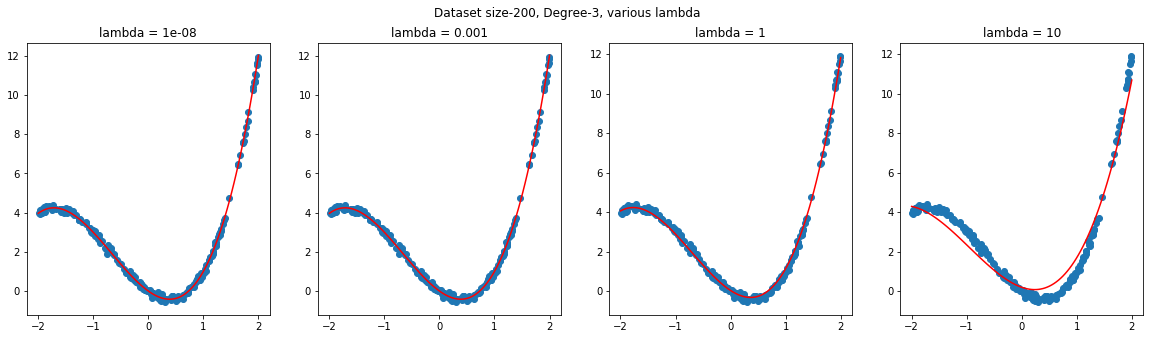

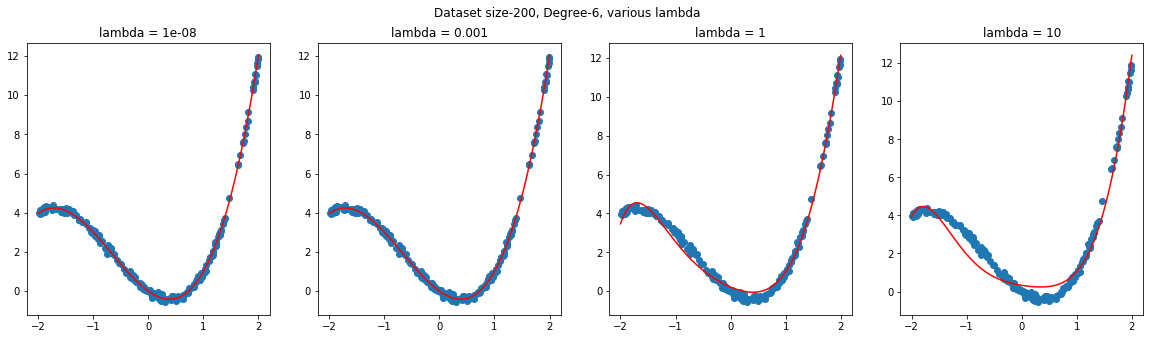

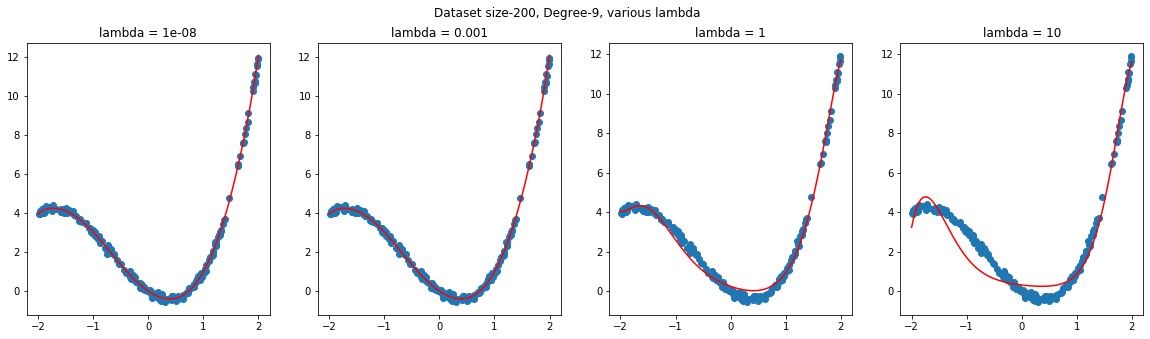

In [218]:
final_func(df,200,2)
final_func(df,200,3)
final_func(df,200,6)
final_func(df,200,9)

In [227]:
best_val_rmse = float("inf")
train_rmse_final = None
test_rmse_final = None
best_params = None
for size in [10, 200]:
    for deg in [2, 3, 6, 9]:
        for lamb in [0, 10**-8, 10**-3, 1, 10]:
            X,Y = get_sample_data(df,size)
            w = poly_regression_with_regu(X,Y,deg,lamb)
            train_rmse, val_rmse, test_rmse = e_rms(w,df,deg)
            print("")
            print("Number of Samples = {}, degree = {}, lambda = {}".format(size, deg, lamb))
            print("Train RMSE : {}, Val RMSE : {}, Test RMSE : {}".format(train_rmse, val_rmse, test_rmse))
            print("")
            if(val_rmse < best_val_rmse):
                train_rmse_final = train_rmse
                test_rmse_final = test_rmse
                best_val_rmse = val_rmse
                best_params = [size, deg, lamb]


Number of Samples = 10, degree = 2, lambda = 0
Train RMSE : 0.037793376219310254, Val RMSE : 0.07621591099984104, Test RMSE : 0.07648904569271807


Number of Samples = 10, degree = 2, lambda = 1e-08
Train RMSE : 0.0377933760922575, Val RMSE : 0.07621591069466838, Test RMSE : 0.07648905287804246


Number of Samples = 10, degree = 2, lambda = 0.001
Train RMSE : 0.03778069727853209, Val RMSE : 0.07618544634851776, Test RMSE : 0.07720653856717316


Number of Samples = 10, degree = 2, lambda = 1
Train RMSE : 0.034220248460086276, Val RMSE : 0.0656137709747718, Test RMSE : 0.32503320566259836


Number of Samples = 10, degree = 2, lambda = 10
Train RMSE : 0.03938421551030558, Val RMSE : 0.07505348027824203, Test RMSE : 0.30863714764788325


Number of Samples = 10, degree = 3, lambda = 0
Train RMSE : 0.0034163099335800403, Val RMSE : 0.006638477994690785, Test RMSE : 0.013090506243210823


Number of Samples = 10, degree = 3, lambda = 1e-08
Train RMSE : 0.003416309628425817, Val RMSE : 0.00663

In [230]:
print('Best Training Rmse- ',train_rmse_final)
print('Best Validation Rmse- ',best_val_rmse)
print('Best Test Rmse- ',test_rmse_final )
print('Best Parameters- ',best_params) 

Best Training Rmse-  0.0027421552201731723
Best Validation Rmse-  0.005098280230532646
Best Test Rmse-  0.005301466420000464
Best Parameters-  [200, 6, 0]


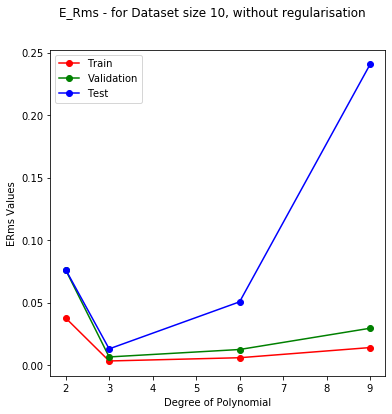

In [220]:
# for dataset size 10 
# without regularisation

f = plt.figure(figsize = (6,6))
f.suptitle('E_Rms - for Dataset size 10, without regularisation')

e_tr2, e_val2, e_tes2 = e_rms(W2_10,df,2)
e_tr3, e_val3, e_tes3 = e_rms(W3_10,df,3)
e_tr6, e_val6, e_tes6 = e_rms(W6_10,df,6)
e_tr9, e_val9, e_tes9 = e_rms(W9_10,df,9)

# print(e_tr2, e_tr3, e_tr9)

ax = f.add_subplot(111)

# print([e_train2,e_train3,e_train6])
ax.plot([2,3,6,9],[e_tr2,e_tr3,e_tr6,e_tr9],'o-r',label = 'Train')
ax.plot([2,3,6,9],[e_val2,e_val3,e_val6,e_val9],'o-g', label = 'Validation')
ax.plot([2,3,6,9],[e_tes2,e_tes3,e_tes6,e_tes9],'o-b', label = 'Test')
ax.set_xlabel('Degree of Polynomial')
ax.set_ylabel('ERms Values')

plt.legend()
# plt.show()

0.03273723935583796 0.002741252522076959 0.0027421552201729177 0.002774956103423854


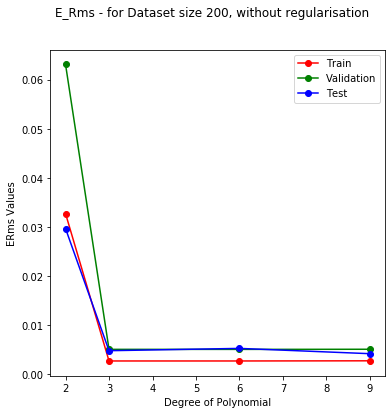

In [221]:
# for dataset size 200
# without regularisation

f = plt.figure(figsize = (6,6))
f.suptitle('E_Rms - for Dataset size 200, without regularisation')

e_tr2, e_val2, e_tes2 = e_rms(W2_200,df,2)
e_tr3, e_val3, e_tes3 = e_rms(W3_200,df,3)
e_tr6, e_val6, e_tes6 = e_rms(W6_200,df,6)
e_tr9, e_val9, e_tes9 = e_rms(W9_200,df,9)

# print(e_tr2, e_tr3, e_tr9)

ax = f.add_subplot(111)

# print([e_train2,e_train3,e_train6])
ax.plot([2,3,6,9],[e_tr2,e_tr3,e_tr6,e_tr9],'o-r',label = 'Train')
ax.plot([2,3,6,9],[e_val2,e_val3,e_val6,e_val9],'o-g', label = 'Validation')
ax.plot([2,3,6,9],[e_tes2,e_tes3,e_tes6,e_tes9],'o-b', label = 'Test')
ax.set_xlabel('Degree of Polynomial')
ax.set_ylabel('ERms Values')
plt.legend()
# plt.show()
print(e_tr2,e_tr3,e_tr6,e_tr9)

Plotting E_rms values for Dataset size-200 degree - 9 and various $\lambda$ values 

In [222]:
size = 200
X, Y = get_sample_data(df,size)

In [223]:
lam_ax = np.linspace(-25,0,100)

E_tr, E_val, E_tes = [], [], []

for i in np.linspace(-25,0,100):
    w = poly_regression_with_regu(X,Y,9,np.exp(i))
    
    e_tr,e_val,e_tes = e_rms(w,df,9)
    E_tr.append(e_tr)
    E_val.append(e_val)
    E_tes.append(e_tes)
    
#     print(len(E_tr))

    
# print(np.array(E_tr).shape)

Text(0, 0.5, 'ERms Values')

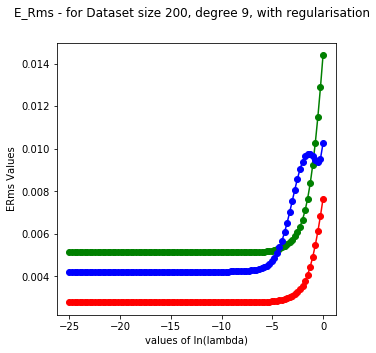

In [224]:
f = plt.figure(figsize = (5,5))

f.suptitle('E_Rms - for Dataset size 200, degree 9, with regularisation')

ax = f.add_subplot(111)

ax.plot(lam_ax,E_tr,'o-r',label = 'Train')
ax.plot(lam_ax,E_val,'o-g', label = 'Validation')
ax.plot(lam_ax,E_tes,'o-b', label = 'Test')
ax.set_xlabel('values of ln(lambda)')
ax.set_ylabel('ERms Values')


We can see that since the values of the dataset are very close to each other Regularisation has very little effect on the Weight matrix.